# Code for download

In [ ]:
import cdsapi

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "2m_dewpoint_temperature",
        "2m_temperature",
        "mean_sea_level_pressure",
        "surface_pressure",
        "100m_u_component_of_wind",
        "100m_v_component_of_wind",
        "10m_u_component_of_neutral_wind",
        "10m_v_component_of_neutral_wind",
        "10m_wind_gust_since_previous_post_processing",
        "mean_snow_evaporation_rate",
        "mean_snowfall_rate",
        "high_cloud_cover",
        "low_cloud_cover",
        "medium_cloud_cover",
        "precipitation_type",
        "convective_snowfall",
        "convective_snowfall_rate_water_equivalent",
        "large_scale_snowfall_rate_water_equivalent",
        "large_scale_snowfall",
        "total_column_snow_water",
        "angle_of_sub_gridscale_orography",
        "anisotropy_of_sub_gridscale_orography",
        "boundary_layer_dissipation",
        "boundary_layer_height",
        "eastward_gravity_wave_surface_stress",
        "eastward_turbulent_surface_stress",
        "friction_velocity",
        "geopotential",
        "gravity_wave_dissipation",
        "total_column_supercooled_liquid_water",
        "zero_degree_level"
    ],
    "year": ["2024"],
    "month": [
        "01", "02", "10",
        "11", "12"
    ],
    "day": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12",
        "13", "14", "15",
        "16", "17", "18",
        "19", "20", "21",
        "22", "23", "24",
        "25", "26", "27",
        "28", "29", "30",
        "31"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "zip",
    "area": [31.48, 77.56, 28.71, 81.02]
}

client = cdsapi.Client(url='https://cds.climate.copernicus.eu/api',key='#Your API KEY Here') #Create an account on CDS website and generate an APi key to make this work
client.retrieve(dataset, request).download()

# Code for conversion

In [85]:
import xarray as xr
import pandas as pd
import numpy as np
import os

# Directory containing the .nc files
nc_folder = r"C:\Users\pgd24-013121114\Downloads\findata\2024"

# List all .nc files in the directory
nc_files = [f for f in os.listdir(nc_folder) if f.endswith('.nc')]

# Loop through each .nc file
for nc_file in nc_files:
    nc_path = os.path.join(nc_folder, nc_file)
    
    try:
        # Open the NetCDF file using xarray
        ds = xr.open_dataset(nc_path)

        # Print the dataset structure for debugging
        print(f"Processing file: {nc_file}")
        print("Dataset dimensions:", ds.dims)

        # Convert the 3D data to a long-format DataFrame (this stacks all dimensions into a MultiIndex)
        df_long = ds.to_dataframe()

        # Reset index to convert the MultiIndex into regular columns
        df_flat = df_long.reset_index()

        # Handle string columns (like 'expver') if necessary
        # Save the DataFrame directly to CSV
        output_path = os.path.join(nc_folder, f"2024_{os.path.splitext(nc_file)[0]}.csv")
        df_flat.to_csv(output_path, index=False)
        
        # Print success message and the first few rows
        print(f"Successfully saved to {output_path}")
        print(f"First few rows:")
        print(df_flat.head())
        
    except Exception as e:
        print(f"Error processing file {nc_file}: {e}")


Processing file: data_stream-oper_stepType-accum.nc
Dataset dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 3648, 'latitude': 12, 'longitude': 14})
Successfully saved to C:\Users\pgd24-013121114\Downloads\findata\2024\2024_data_stream-oper_stepType-accum.csv
First few rows:
  valid_time  latitude  longitude  number expver  csf           lsf  \
0 2024-01-01     31.46      77.56       0   0001  0.0  0.000000e+00   
1 2024-01-01     31.46      77.81       0   0001  0.0  0.000000e+00   
2 2024-01-01     31.46      78.06       0   0001  0.0  1.573935e-07   
3 2024-01-01     31.46      78.31       0   0001  0.0  7.890631e-07   
4 2024-01-01     31.46      78.56       0   0001  0.0  1.256354e-06   

            bld         lgws         ewss          gwd  
0   3513.260254  -320.523682  -706.229004  1040.642090  
1   7213.260254  -181.461182 -1119.666504  1799.142090  
2   8053.260254   546.351318  -896.729004  5863.642090  
3  11578.259766  1231.101318  -890.354004  8675.141602  

In [87]:
import pandas as pd
import os

# Folder where the CSV files are located
csv_folder = r"C:\Users\pgd24-013121114\Downloads\findata\2024"

# List all .csv files in the directory
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# Initialize an empty DataFrame for merging
merged_df = pd.DataFrame()

# Loop through each CSV file and merge it with the existing DataFrame
for csv_file in csv_files:
    csv_path = os.path.join(csv_folder, csv_file)
    
    try:
        # Load the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Print the file being processed and its shape for debugging
        print(f"Processing file: {csv_file}")
        print(f"DataFrame shape before merge: {df.shape}")
        
        # Merge the current DataFrame with the merged_df on the specified columns
        if merged_df.empty:
            # For the first file, just assign the df to merged_df
            merged_df = df
        else:
            # For subsequent files, merge on the specified columns
            merged_df = pd.merge(merged_df, df, on=['latitude', 'longitude', 'valid_time', 'expver', 'number'], how='outer')
        
        # Print the shape after merging for debugging
        print(f"DataFrame shape after merge: {merged_df.shape}")
        
    except Exception as e:
        print(f"Error processing file {csv_file}: {e}")

# Optionally, save the merged DataFrame to a CSV
output_path = os.path.join(csv_folder, "merged_data.csv")
merged_df.to_csv(output_path, index=False)

print(f"\nMerged DataFrame saved to {output_path}")
print(f"Final merged DataFrame shape: {merged_df.shape}")


Processing file: 2024_data_stream-oper_stepType-accum.csv
DataFrame shape before merge: (612864, 11)
DataFrame shape after merge: (612864, 11)
Processing file: 2024_data_stream-oper_stepType-avg.csv
DataFrame shape before merge: (612864, 7)
DataFrame shape after merge: (612864, 13)
Processing file: 2024_data_stream-oper_stepType-instant.csv
DataFrame shape before merge: (612864, 27)
DataFrame shape after merge: (612864, 35)
Processing file: 2024_data_stream-oper_stepType-max.csv
DataFrame shape before merge: (612864, 6)
DataFrame shape after merge: (612864, 36)

Merged DataFrame saved to C:\Users\pgd24-013121114\Downloads\findata\2024\merged_data.csv
Final merged DataFrame shape: (612864, 36)


In [81]:
import xarray as xr
import pandas as pd
import numpy as np

# Open the NetCDF file
precip_nc_file = r"C:\Users\pgd24-013121114\Downloads\findata\2024\data_stream-oper_stepType-instant.nc"
ds = xr.open_dataset(precip_nc_file)

# Print the dataset structure
print("Dataset dimensions:", ds.dims)

# Convert the 3D data to a long-format DataFrame
# This stacks all dimensions into a MultiIndex
df_long = ds.to_dataframe()

# Reset index to convert the MultiIndex into regular columns
df_flat = df_long.reset_index()

# Check the resulting DataFrame
print("DataFrame columns:", df_flat.columns)
print("DataFrame shape:", df_flat.shape)

# Handle string columns (like 'expver') by replacing np.savetxt
# Save the DataFrame directly to CSV
try:
    output_path = r"C:\Users\pgd24-013121114\Downloads\findata\2024\data_stream-oper_stepType-instant24.csv"
    df_flat.to_csv(output_path, index=False)
    print(f"Successfully saved to {output_path}")
    print(f"First few rows:")
    print(df_flat.head())
except Exception as e:
    print(f"Error saving CSV: {e}")

D:\Anaconda\envs\ml\Lib\site-packages\pyproj\network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


Dataset dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 3648, 'latitude': 12, 'longitude': 14})
DataFrame columns: Index(['valid_time', 'latitude', 'longitude', 'number', 'expver', 'd2m', 't2m',
       'msl', 'sp', 'u100', 'v100', 'u10n', 'v10n', 'hcc', 'lcc', 'mcc',
       'ptype', 'csfr', 'lssfr', 'tcsw', 'anor', 'isor', 'blh', 'zust', 'z',
       'tcslw', 'deg0l'],
      dtype='object')
DataFrame shape: (612864, 27)
Successfully saved to C:\Users\pgd24-013121114\Downloads\findata\2024\data_stream-oper_stepType-instant24.csv
First few rows:
  valid_time  latitude  longitude  number expver         d2m         t2m  \
0 2024-01-01     31.46      77.56       0   0001  259.142517  274.615845   
1 2024-01-01     31.46      77.81       0   0001  253.870041  265.190063   
2 2024-01-01     31.46      78.06       0   0001  249.093674  254.028931   
3 2024-01-01     31.46      78.31       0   0001  244.363205  246.427368   
4 2024-01-01     31.46      78.56       0   0001  243.728

# Code for conversion other formats

In [ ]:
import xarray as xr
import pandas as pd
from netCDF4 import num2date

# Open the NetCDF file
precip_nc_file = r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-instant.nc"
ds = xr.open_dataset(precip_nc_file)

# First, examine the dataset structure
print("Dataset dimensions:", ds.dims)

# Convert to DataFrame directly - this preserves the multi-index structure
df = ds.to_dataframe()

# Reset the index to convert the multi-index to columns
df_reset = df.reset_index()

# Handle valid_time conversion if needed
if 'valid_time' in ds.coords:
    if 'units' in ds.valid_time.attrs:
        valid_time_units = ds.valid_time.attrs['units']
        valid_time_dates = num2date(ds.valid_time.values, valid_time_units)
        df_reset['valid_time'] = pd.to_datetime(valid_time_dates)

# Save to CSV
df_reset.to_csv(r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-instant.csv", index=False)

# Print first few rows to verify
print(df_reset.head())

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

# Open the NetCDF file using xarray
precip_nc_file = r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-instant.nc"
ds = xr.open_dataset(precip_nc_file)

# Check the contents of the dataset
print(ds)

# Extract latitude and longitude
lat = ds.variables['latitude'][:]
lon = ds.variables['longitude'][:]

# Convert the dataset to a pandas dataframe
df = ds.to_dataframe()

# Reshape latitude and longitude to match the shape of the DataFrame
# Repeat latitudes and longitudes for all times and other dimensions
lat_reshaped = np.tile(lat, (df.shape[0] // len(lat), 1)).flatten()
lon_reshaped = np.tile(lon, (df.shape[0] // len(lon), 1)).flatten()

# Add latitude and longitude to the dataframe
df['latitude'] = lat_reshaped
df['longitude'] = lon_reshaped

# Save the dataframe to a CSV file
df.to_csv(r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-instant.csv", index=False)

# Optionally, print the first few rows to check the output
print(df.head())


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

# Open the NetCDF file
precip_nc_file = r"C:\Users\pgd24-013121114\Downloads\dbe9239b96494b2b137a7fdd53b89a28\data_stream-enda_stepType-avg.nc"
ds = xr.open_dataset(precip_nc_file)

# Print the dataset structure
print("Dataset dimensions:", ds.dims)

# Convert the 3D data to a long-format DataFrame
# This stacks all dimensions into a MultiIndex
df_long = ds.to_dataframe()

# Reset index to convert the MultiIndex into regular columns
df_flat = df_long.reset_index()

# Check the resulting DataFrame
print("DataFrame columns:", df_flat.columns)
print("DataFrame shape:", df_flat.shape)

# Handle string columns (like 'expver') by replacing np.savetxt
# Save the DataFrame directly to CSV
try:
    output_path = r"C:\Users\pgd24-013121114\Downloads\dbe9239b96494b2b137a7fdd53b89a28\data_stream-enda_stepType-avg.csv"
    df_flat.to_csv(output_path, index=False)
    print(f"Successfully saved to {output_path}")
    print(f"First few rows:")
    print(df_flat.head())
except Exception as e:
    print(f"Error saving CSV: {e}")

# Composite for 24 hrs

In [157]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r"C:\Users\pgd24-013121114\Downloads\findata\2024\merged_data.csv")

# Rename columns to more descriptive names
column_mapping = {
    'u100': '100m_u_component_of_wind', 
    'v100': '100m_v_component_of_wind',
    'u10n': '10m_u_component_of_wind',
    'v10n': '10m_v_component_of_wind',
    'fg10': '10m_wind_gust',
    'd2m': '2m_dewpoint_temperature',
    't2m': '2m_temperature',
    'anor': 'angle_of_sub_gridscale_orography',
    'isor': 'anisotropy_of_sub_gridscale_orography',
    'mser': 'mean_snow_evaporation_rate',
    'msr': 'mean_snowfall_rate',
    'cbh': 'cloud_base_height',
    'mcc': 'medium_cloud_cover',
    'ptype': 'precipitation_type',
    'sp': 'surface_pressure',
    'tcsw': 'total_column_snow_water',
    'tcslw': 'total_column_supercooled_liquid_water',
    'deg0l': 'zero_degree_level',
    'bld': 'boundary_layer_dissipation',
    'blh': 'boundary_layer_height',
    'cin': 'convective_inhibition',
    'csf': 'convective_snowfall',
    'csfr': 'convective_snowfall_rate_water_equivalent',
    'lgws': 'eastward_gravity_wave_surface_stress',
    'ewss': 'eastward_turbulent_surface_stress',
    'zust': 'friction_velocity',
    'z': 'geopotential',
    'gwd': 'gravity_wave_dissipation',
    'hcc': 'high_cloud_cover',
    'lsfr': 'large_scale_snowfall_rate_water_equivalent',
    'lsf': 'large_scale_snowfall',
    'lcc': 'low_cloud_cover',
    'msl': 'mean_sea_level_pressure'
}
df.rename(columns=column_mapping, inplace=True)

# Convert valid_time to datetime with correct format
df['valid_time'] = pd.to_datetime(df['valid_time'], format='%Y-%m-%d %H:%M:%S')

# Add 6-hourly period identification
def assign_6hourly_period(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 6:
        return timestamp.replace(hour=0, minute=0, second=0)
    elif 6 <= hour < 12:
        return timestamp.replace(hour=6, minute=0, second=0)
    elif 12 <= hour < 18:
        return timestamp.replace(hour=12, minute=0, second=0)
    else:
        return timestamp.replace(hour=18, minute=0, second=0)

df['period'] = df['valid_time'].apply(assign_6hourly_period)

def create_composite(group):
    """
    Create a composite row for each unique (period, lat, lon) combination
    with proper scientific aggregations.
    """
    # Initialize composite row
    composite_row = group.iloc[0].copy()
    
    # Define aggregation methods for different variable types
    mean_cols = [
        '10m_u_component_of_wind', '10m_v_component_of_wind',
        '100m_u_component_of_wind', '100m_v_component_of_wind',
        '2m_dewpoint_temperature', '2m_temperature',
        'mean_sea_level_pressure', 'surface_pressure',
        'boundary_layer_height', 'convective_inhibition',
        'friction_velocity', 'geopotential',
        'total_column_supercooled_liquid_water', 'zero_degree_level',
        'cloud_base_height'
    ]
    
    sum_cols = [
        'mean_snow_evaporation_rate', 'mean_snowfall_rate',
        'convective_snowfall_rate_water_equivalent',
        'large_scale_snowfall_rate_water_equivalent',
        'total_column_snow_water', 'convective_snowfall',
        'large_scale_snowfall',
        'boundary_layer_dissipation'  # Now correctly in sum_cols
    ]
    
    max_cols = [
        '10m_wind_gust',
        'high_cloud_cover', 'low_cloud_cover', 'medium_cloud_cover'
    ]
    
    # Apply aggregations
    for col in mean_cols:
        if col in group.columns:
            composite_row[col] = group[col].mean()
    
    for col in sum_cols:
        if col in group.columns:
            composite_row[col] = group[col].sum()
    
    for col in max_cols:
        if col in group.columns:
            composite_row[col] = group[col].max()
    
    # Handle categorical columns
    if 'precipitation_type' in group.columns:
        composite_row['precipitation_type'] = group['precipitation_type'].mode()[0] if not group['precipitation_type'].mode().empty else np.nan
    
    # Set the composite time
    composite_row['valid_time'] = group['period'].iloc[0]
    
    return composite_row

# Group by period, latitude, and longitude before applying composite
composite_df = df.groupby(['period', 'latitude', 'longitude']).apply(create_composite).reset_index(drop=True)

for col in mean_cols:
        if col in group.columns:
            composite_df[col] = composite_df[col]..iloc[0]/6

# Convert back to original column names
reverse_mapping = {v: k for k, v in column_mapping.items()}
composite_df.rename(columns=reverse_mapping, inplace=True)

# Save results
output_path = r"C:\Users\pgd24-013121114\Downloads\findata\2024\6hourly_spatial_composite2.csv"
composite_df.to_csv(output_path, index=False)

print("\nProcessing complete. Results saved to:", output_path)
print("Final composite data preview:")
print(composite_df[['valid_time', 'latitude', 'longitude', 'bld', 't2m', 'msl']].head())


Processing complete. Results saved to: C:\Users\pgd24-013121114\Downloads\findata\2024\6hourly_composite.csv
Final composite data preview:
           valid_time          bld         t2m            msl
0 2024-01-01 00:00:00  4236.421352  272.505102  102190.085193
1 2024-01-01 06:00:00  4727.424456  279.164887  101888.994670
2 2024-01-01 12:00:00  2762.834788  275.571807  101925.594607
3 2024-01-01 18:00:00  4526.567923  271.197738  101997.054844
4 2024-01-02 00:00:00  4747.271680  271.848881  102126.494172


C:\Users\pgd24-013121114\AppData\Local\Temp\ipykernel_12916\3043435682.py:127: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  composite_df = df.groupby('period').apply(create_composite).reset_index(drop=True)


C:\Users\pgd24-013121114\AppData\Local\Temp\ipykernel_32388\1948799648.py:119: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  composite_df = df.groupby(['period', 'latitude', 'longitude']).apply(create_composite).reset_index(drop=True)


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\pgd24-013121114\\Downloads\\findata\\2024\\6hourly_spatial_composite.csv'

In [ ]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r"C:\Users\pgd24-013121114\Downloads\G3\GROUP NO.3\raw_data_csv_format.csv")

# Rename columns to match the expected names
column_mapping = {
    'u100': '100m u component of wind', 
    'v100': '100m v component of wind',
    'u10n': '10m u component of wind',
    'v10n': '10m v component of wind', 
    'fg10': '10m wind gust since previous post processing',
    'd2m': '2m dewpoint temperature', 
    't2m': '2m temperature',
    'mser': 'mean snow evaporation rate',
    'msr': 'mean snowfall rate',
    'cbh': 'cloud base height',
    'mcc': 'medium cloud cover',
    'ptype': 'precipitation type',
    'sp': 'surface pressure',
    'tcsw': 'total column snow water',
    'tcslw': 'total column supercooled liquid water',
    'deg0l': 'zero degree level'
}
df.rename(columns=column_mapping, inplace=True)

# Convert time to datetime
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')

# Add 6-hourly period identification
def assign_6hourly_period(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 6:
        return timestamp.replace(hour=0, minute=0, second=0)
    elif 6 <= hour < 12:
        return timestamp.replace(hour=6, minute=0, second=0)
    elif 12 <= hour < 18:
        return timestamp.replace(hour=12, minute=0, second=0)
    else:
        return timestamp.replace(hour=18, minute=0, second=0)

# Extract 6-hourly period
df['period'] = df['time'].apply(assign_6hourly_period)

# Function to create composite values
def create_composite(group):
    composite_row = group.iloc[0].copy()  # Start with first row
    
    # Get actual column names in the dataframe
    available_columns = group.columns.tolist()
    
    # Define columns by aggregation type
    mean_cols = [
        col for col in [
            '10m u component of wind', '10m v component of wind',
            '100m u component of wind', '100m v component of wind',
            '2m dewpoint temperature', '2m temperature',
            'mean sea level pressure', 'surface pressure',
            'boundary layer dissipation', 'boundary layer height',
            'convective inhibition', 'eastward gravity wave surface stress',
            'eastward turbulent surface stress', 'friction velocity',
            'geopotential', 'gravity wave dissipation',
            'total column supercooled liquid water', 'zero degree level'
        ] if col in available_columns
    ]
    
    sum_cols = [
        col for col in [
            'mean snow evaporation rate', 'mean snowfall rate',
            'convective snowfall rate water equivalent',
            'large scale snowfall rate water equivalent',
            'total column snow water', 'convective snowfall',
            'large-scale snowfall'
        ] if col in available_columns
    ]
    
    max_cols = [
        col for col in [
            '10m wind gust since previous post processing',
            'high cloud cover', 'low cloud cover', 'medium cloud cover'
        ] if col in available_columns
    ]
    
    mean_first_cols = [
        col for col in ['cloud base height'] if col in available_columns
    ]
    
    # Apply aggregations
    for col in mean_cols:
        composite_row[col] = group[col].mean()
    
    for col in sum_cols:
        composite_row[col] = group[col].sum()
    
    for col in max_cols:
        composite_row[col] = group[col].max()
    
    for col in mean_first_cols:
        composite_row[col] = group[col].mean()
    
    # Handle categorical columns
    categorical_cols = [
        col for col in ['precipitation type'] if col in available_columns
    ]
    for col in categorical_cols:
        mode_val = group[col].mode()
        composite_row[col] = mode_val.iloc[0] if not mode_val.empty else group[col].iloc[0]
    
    # Handle first occurrence columns
    first_occurrence_cols = [
        col for col in [
            'angle of sub-gridscale orography', 
            'anisotropy of sub-gridscale orography'
        ] if col in available_columns
    ]
    for col in first_occurrence_cols:
        composite_row[col] = group[col].iloc[0]
    
    # Set time to the start of the 6-hour period
    composite_row['time'] = group['period'].iloc[0]
    
    return composite_row

# Updated grouping method
composite_df = df.groupby('period', group_keys=False).apply(create_composite)

# Remove temporary columns
if 'period' in composite_df.columns:
    composite_df = composite_df.drop(columns=['period'])

# Save results
composite_df.to_csv(r"C:\Users\pgd24-013121114\Downloads\G3\GROUP NO.3\comp.csv", index=False)

print(composite_df.head())
print("\n6-Hourly Periods:")
print("0: 00:00 - 05:59")
print("6: 06:00 - 11:59")
print("12: 12:00 - 17:59")
print("18: 18:00 - 23:59")

In [79]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv(r"C:\Users\pgd24-013121114\Downloads\G3\GROUP NO.3\raw_data_csv_format.csv")

# Rename columns to match the expected names
column_mapping = {
  'u100':'100m u componenet of wind', 'v100':'100m v-component of wind',
                              'u10n':'10m u-componenet of wind','v10n':'10m v-componenet of wind',
    'fg10':'10m wind gust','d2m':'2m dewpoint temperature','t2m':'2m temperature','anor':'Angle of sub-gridscale orography',
    'isor':'Anisotropy of sub-gridscale orography',
    'mser':'Mean snow evaporation rate', 'msr':'Mean snowfall rate','cbh':'Cloud base height',
    'mcc':'Medium cloud cover','ptype':'Precipitation type','sp':'Surface pressure',
    'tcsw':' Total column snow water','tcslw':'Total column supercooled liquid water','deg0l':'Zero degree level',
    'bld':'Boundary layer dissipation', 'blh':'Boundary layer height',
    'cbh':'Cloud base height','cin':'Convective inhibition','csf':'Convective snowfall',
    'csfr':'Convective snowfall rate water equivalent','lgws':' Eastward gravity wave surface stress',
    'ewss':'Eastward turbulent surface stress','zust':'Friction velocity','z':'Geopotential',
    'gwd':'Gravity wave dissipation','hcc':'High cloud cover','lssfr':'Large scale snowfall rate water equivalent','lsf':'Large-scale snowfall','lcc':'Low cloud cover','msl':'Mean sea level pressure'
}
df.rename(columns=column_mapping, inplace=True)

# Convert time to datetime
df['time'] = pd.to_date(df['time'], format='%Y-%m-%d %H:%M:%S')

# Add 6-hourly period identification
def assign_6hourly_period(timestamp):
    hour = timestamp.hour
    if 0 <= hour < 6:
        return timestamp.replace(hour=0, minute=0, second=0)
    elif 6 <= hour < 12:
        return timestamp.replace(hour=6, minute=0, second=0)
    elif 12 <= hour < 18:
        return timestamp.replace(hour=12, minute=0, second=0)
    else:
        return timestamp.replace(hour=18, minute=0, second=0)

# Extract 6-hourly period
df['period'] = df['time'].apply(assign_6hourly_period)

# Function to create composite values
def create_composite(group):
    composite_row = group.iloc[0].copy()  # Start with first row
    
    # Get actual column names in the dataframe
    available_columns = group.columns.tolist()
    
    # Define columns by aggregation type
    mean_cols = [
        col for col in [
            '10m u component of wind', '10m v component of wind',
            '100m u component of wind', '100m v component of wind',
            '2m dewpoint temperature', '2m temperature',
            'mean sea level pressure', 'surface pressure',
            'boundary layer dissipation', 'boundary layer height',
            'convective inhibition', 'eastward gravity wave surface stress',
            'eastward turbulent surface stress', 'friction velocity',
            'geopotential', 'gravity wave dissipation',
            'total column supercooled liquid water', 'zero degree level'
        ] if col in available_columns
    ]
    
    sum_cols = [
        col for col in [
            'mean snow evaporation rate', 'mean snowfall rate',
            'convective snowfall rate water equivalent',
            'large scale snowfall rate water equivalent',
            'total column snow water', 'convective snowfall',
            'large-scale snowfall'
        ] if col in available_columns
    ]
    
    max_cols = [
        col for col in [
            '10m wind gust since previous post processing',
            'high cloud cover', 'low cloud cover', 'medium cloud cover'
        ] if col in available_columns
    ]
    
    mean_first_cols = [
        col for col in ['cloud base height'] if col in available_columns
    ]
    
    # Apply aggregations
    for col in mean_cols:
        composite_row[col] = group[col].mean()
    
    for col in sum_cols:
        composite_row[col] = group[col].sum()
    
    for col in max_cols:
        composite_row[col] = group[col].max()
    
    for col in mean_first_cols:
        composite_row[col] = group[col].mean()
    
    # Handle categorical columns
    categorical_cols = [
        col for col in ['precipitation type'] if col in available_columns
    ]
    for col in categorical_cols:
        mode_val = group[col].mode()
        composite_row[col] = mode_val.iloc[0] if not mode_val.empty else group[col].iloc[0]
    
    # Handle first occurrence columns
    first_occurrence_cols = [
        col for col in [
            'angle of sub-gridscale orography', 
            'anisotropy of sub-gridscale orography'
        ] if col in available_columns
    ]
    for col in first_occurrence_cols:
        composite_row[col] = group[col].iloc[0]
    
    # Set time to the start of the 6-hour period
    composite_row['time'] = group['period'].iloc[0]
    
    # Add latitude and longitude
    composite_row['latitude'] = group['latitude'].iloc[0]
    composite_row['longitude'] = group['longitude'].iloc[0]
    
    return composite_row

# Updated grouping method
composite_df = df.groupby('period', group_keys=False).apply(create_composite)

# Remove temporary columns
if 'period' in composite_df.columns:
    composite_df = composite_df.drop(columns=['period'])

# Save results
composite_df.to_csv(r"C:\Users\pgd24-013121114\Downloads\G3\GROUP NO.3\vp.csv", index=False)

print(composite_df.head())
print("\n6-Hourly Periods: ")
print("0: 00:00 - 05:59")
print("6: 06:00 - 11:59")
print("12: 12:00 - 17:59")
print("18: 18:00 - 23:59")


                     longitude  latitude  100m u componenet of wind  \
period                                                                
2015-01-01 00:00:00  77.580002     31.23                  -3.020086   
2015-01-01 06:00:00  77.580002     31.23                  -1.918814   
2015-01-01 12:00:00  77.580002     31.23                  -0.305076   
2015-01-01 18:00:00  77.580002     31.23                  -1.629524   
2015-01-02 00:00:00  77.580002     31.23                  -1.649614   

                     100m v-component of wind  10m u-componenet of wind  \
period                                                                    
2015-01-01 00:00:00                 -1.269500                 -0.703863   
2015-01-01 06:00:00                 -0.621730                 -1.707320   
2015-01-01 12:00:00                 -1.223846                 -0.056676   
2015-01-01 18:00:00                 -0.837866                 -0.376865   
2015-01-02 00:00:00                 -1.717096       

C:\Users\pgd24-013121114\AppData\Local\Temp\ipykernel_12916\1326952654.py:126: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  composite_df = df.groupby('period', group_keys=False).apply(create_composite)


# Merging

In [ ]:
import pandas as pd

# Define the paths for your CSV files
csv_file1 = r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-instant.csv"
csv_file2 = r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-accum.csv"
csv_file3 = r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-avg.csv"
csv_file4 = r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-max.csv"
csv_file5 =r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\data_stream-oper_stepType-instant3.csv"

# Load the CSV files into DataFrames
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)
df3 = pd.read_csv(csv_file3)
df4 = pd.read_csv(csv_file4)
df5 = pd.read_csv(csv_file5)

# Merge the DataFrames on latitude, longitude, and valid_time
# Make sure the column names match across all files, otherwise you can rename them
merged_df = pd.merge(df1, df2, on=['latitude', 'longitude', 'valid_time','expver', 'number'], how='outer')
merged_df = pd.merge(merged_df, df3, on=['latitude', 'longitude', 'valid_time','expver', 'number'], how='outer')
merged_df = pd.merge(merged_df, df4, on=['latitude', 'longitude', 'valid_time','expver', 'number'], how='outer')
merged_df = pd.merge(merged_df, df5, on=['latitude', 'longitude', 'valid_time','expver', 'number'], how='outer')

# Save the combined DataFrame to a new CSV file
merged_df.to_csv(r"C:\Users\pgd24-013121114\Downloads\d63c1bafbef6b72520fd76a63938ea47\combined_output1.csv", index=False)

# Optionally, print the first few rows of the combined DataFrame
print(merged_df.head())


# Stats

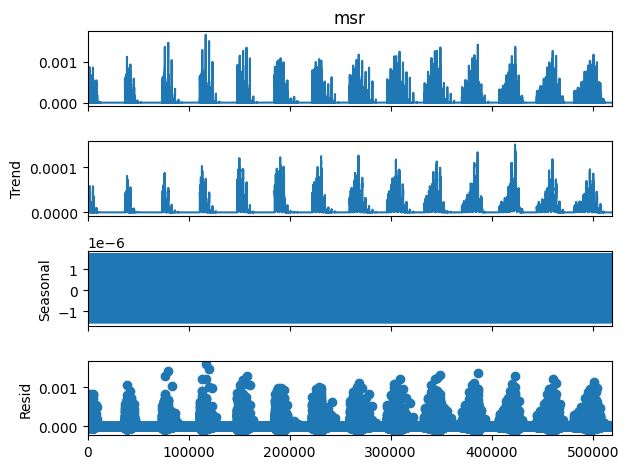

In [11]:

import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
csv_file5 =r"C:\Users\pgd24-013121114\Downloads\G3\GROUP NO.3\raw_data_csv_format.csv"
df = pd.read_csv(csv_file5)

# Seasonal decomposition to check trend, seasonality, and residuals
decompose_result = seasonal_decompose(df['msr'], model='additive', period=120)  # 120 intervals for monthly pattern
 
decompose_result.plot()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller
 
# ADF test to check stationarity
adf_test = adfuller(df['msr'])
print(f'ADF Test Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
 
# Check if p-value < 0.05 to reject null hypothesis and confirm stationarity
if adf_test[1] < 0.05:
    print("The data is stationary. No differencing required.")
else:
    print("The data is not stationary. Differencing may be needed.")

ADF Test Statistic: -37.06573771308024
p-value: 0.0
The data is stationary. No differencing required.
